# Ventilator Study
### This notebook demonstrates a connection between System Model and Studio and Amesim to drive parameters into a real-time ventilator and patient model.

![Inline-style image](AmesimModel.png 'Amesim Image')

In [31]:
%acel clear 
%include Ventilator_Acel.acel

In [32]:
acel.lib.displayAcelModel(acel.amesim_model)

In [33]:
architectures = acel.lib.solve(acel.amesim_model, allowUnconnectedArchitectures=True,saveArchitectures=True, outputTime=1)

Run: amesim_model - 
 - - - - - - - - - - - - - - -
Creating ensembles...
... done in 0.123 seconds.
 - 1 total ensembles
... Instantiating ensembles...
 ... 100.00% instantiated in 0.026 seconds
 - 1 ensembles
... done in 0.152 seconds, maximum tree width = 0, maximum multiplicity = 1.
 - - - - - - - - - - - - - - -
Creating architectures...
 - 1 unique architectures in 0.259 seconds
... done in 0.260 seconds.
 - - - - - - - - - - - - - - -
 - - - - - - - - - - - - - - -
 - - - - - - - - - - - - - - -
Done: amesim_model - 
 -  1 Ensemble
 -  1 Architecture
 -  1 Iteration
 -  0 Unconnected Solutions
 -  0 Symmetric Solutions
 -  0.259 " Total ConnectionSolving
 -  0.006 " SAT Solving
 -  0.001 " Filtering
 -  0.000 " Data Interpretation
 -  0.177 " File IO
 -  933.2 MB Memory Usage


In [4]:
acel.lib.displayArchitectures(architectures)

Access the System Model that is in GitHUB folder with a python module "caplellambse" that can read and modify the SMW/Capella model content.

In [34]:
import capellambse
import ipywidgets as widgets
from IPython.core.display import HTML

resources = {
    "CR_Ventilator_Sim": "CR_Ventilator_Sim/CR_Ventilator_Sim",
}
path_to_model = "../CR_Ventilator.aird"
model = capellambse.MelodyModel(path_to_model, resources=resources, jupyter_untrusted=False)

Cell [34]:9: DeprecationWarning:

The 'jupyter_untrusted' argument is no longer needed and will be removed soon. Please remove it from your calls.

Duplicate UUID '_LB2MSY7lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MS47lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MTY7lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MT47lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MUY7lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird
Duplicate UUID '_LB2MU47lEeqNepwDMv-GAw' within fragment CR_Ventilator.aird


Display a diagram from the capella module with parameters being accessed.


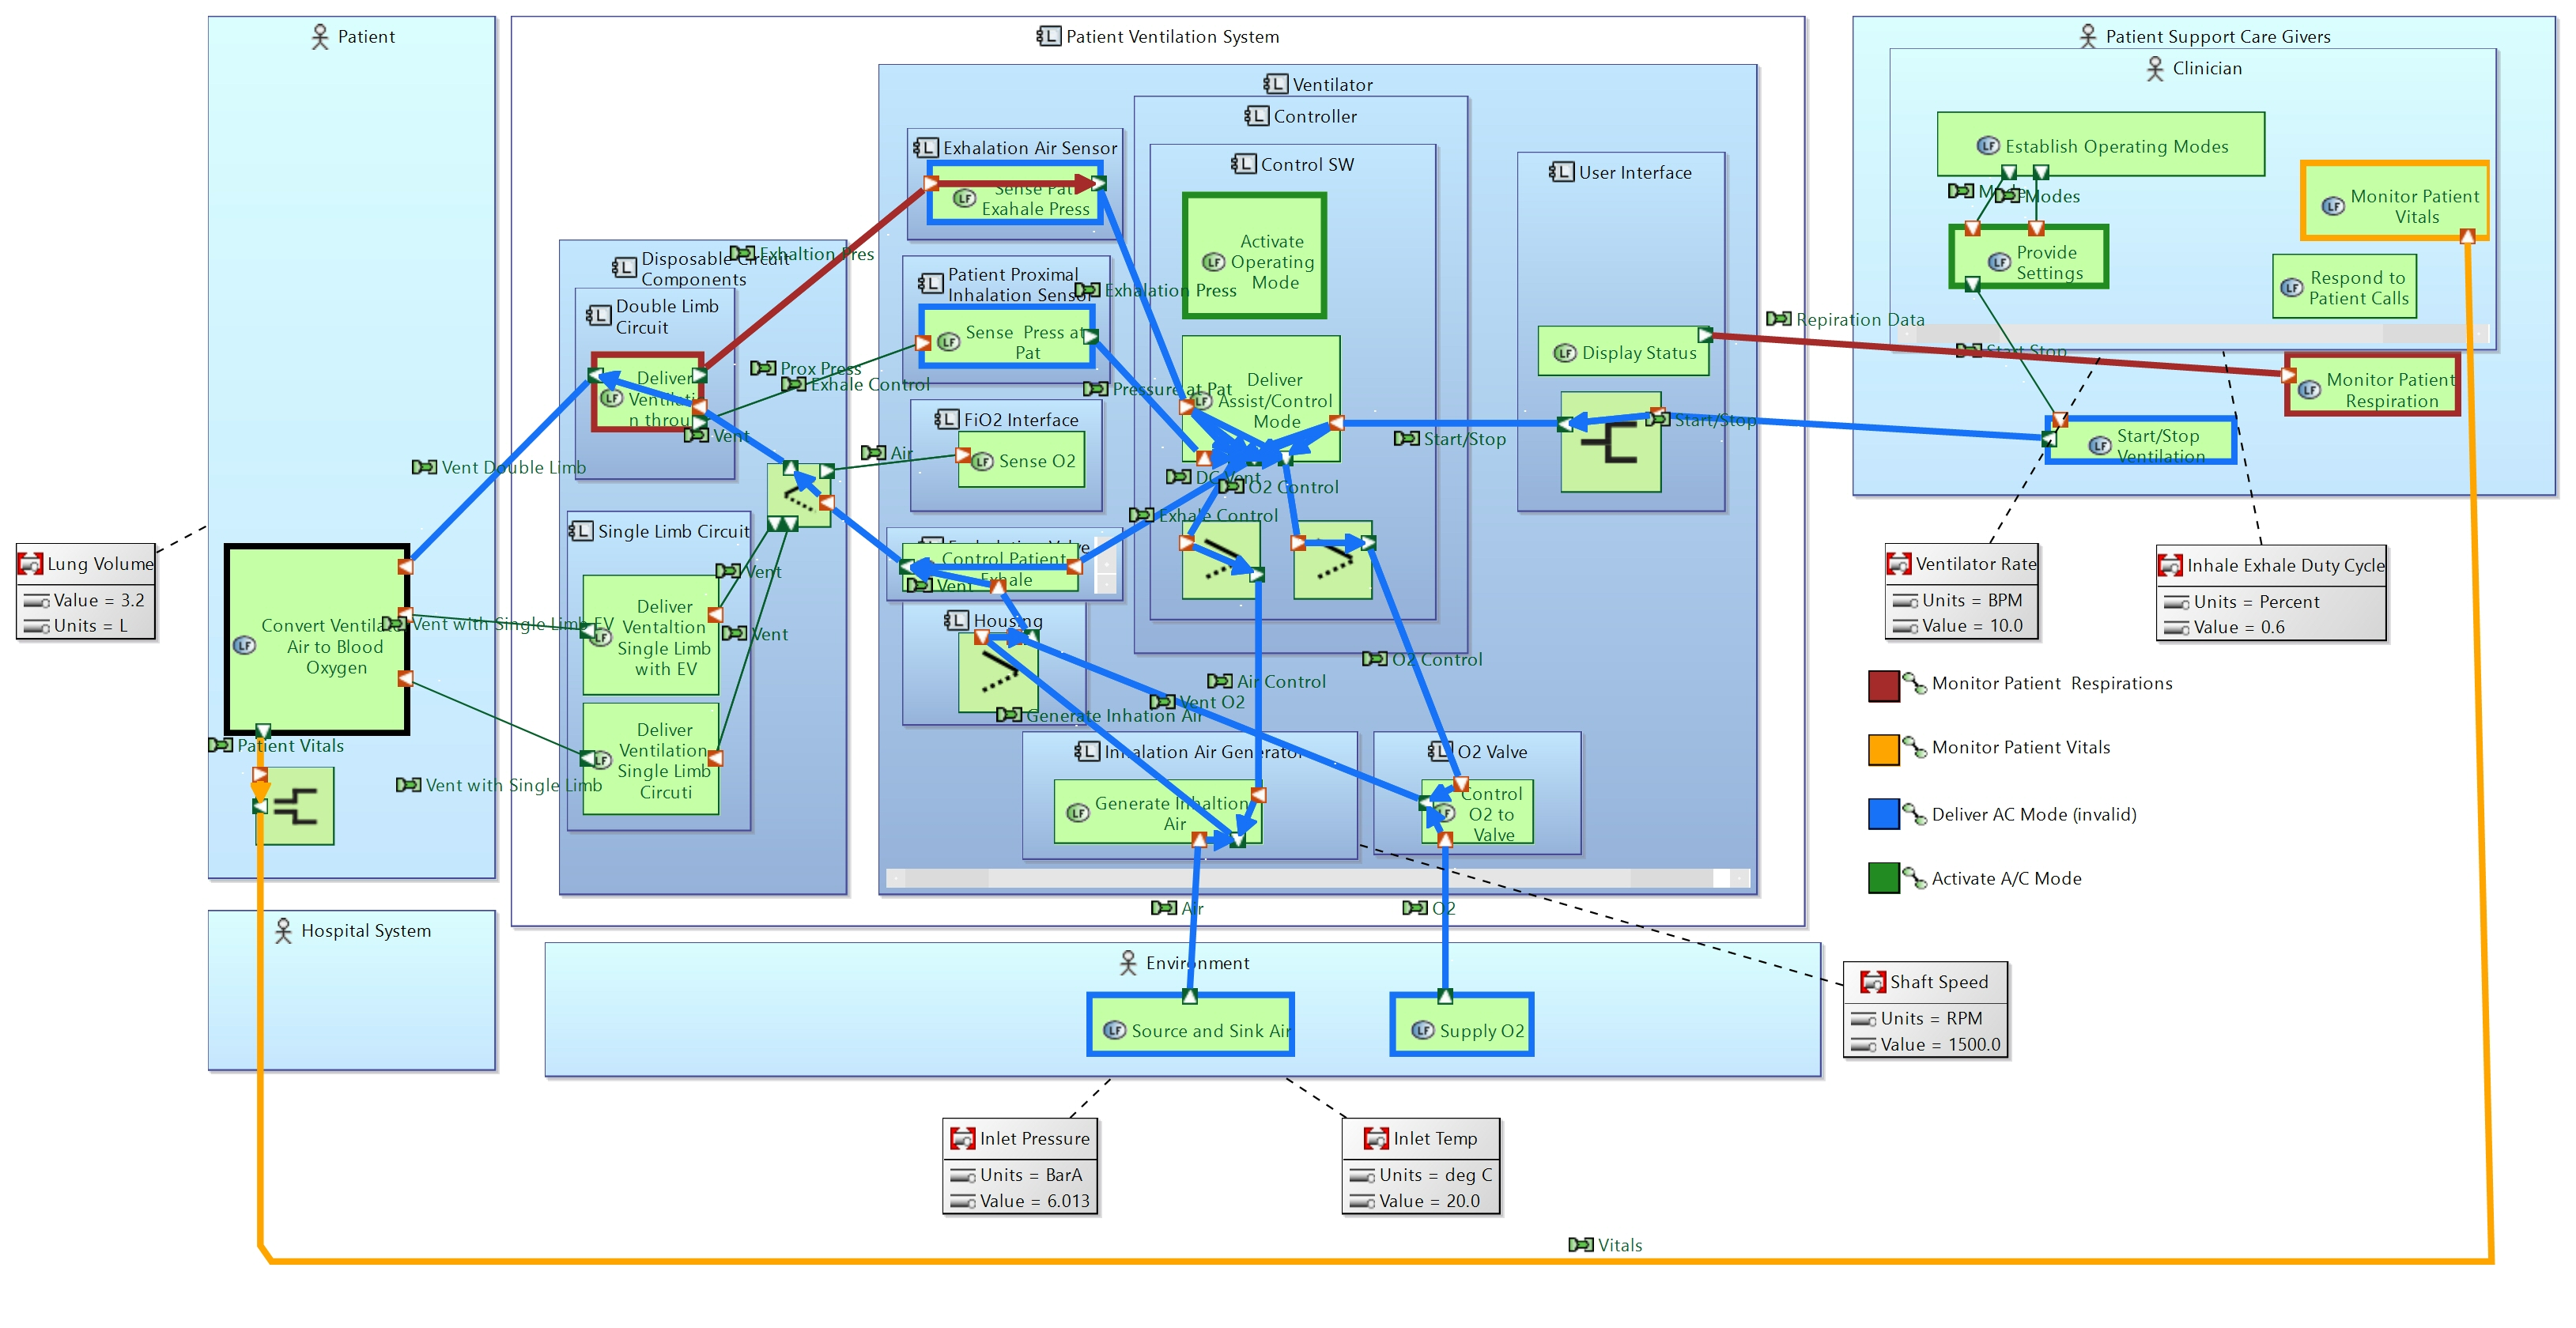

In [35]:
from IPython import display as diag_display
diag_display.Image("../Images/Demo 1[LAB] Double Limb AC View.jpg")


Use the slider below to adjust the default values by the slider amount.

In [36]:

lung_slider = widgets.FloatSlider(min=-3.2, max=5, step=0.1, value=0.0, description='Lung Volume:')
Inlet_Pressure_slider = widgets.FloatSlider(min=-6, max=6.0, step=0.1, value=0.0, description='Inlet Pressure:')
Inlet_Temp_slider = widgets.FloatSlider(min=-3.2, max=5, step=0.1, value=0.0, description='Inlet Temp:')
Shaft_Speed_slider = widgets.FloatSlider(min=-1500, max=3000, step=100, value=0.0, description='Shaft Speed:')
Ventilator_Rate_slider = widgets.FloatSlider(min=-10, max=10, step=0.1, value=0.0, description='Ventilator Rate:')
Inhale_Exhale_Duty_Cycle_slider = widgets.FloatSlider(min=-0.6, max=.9, step=0.1, value=0.0, description='Inhale Exhale DutyCycle:')
display(lung_slider,Inlet_Pressure_slider,Inlet_Temp_slider,Shaft_Speed_slider,Ventilator_Rate_slider,Inhale_Exhale_Duty_Cycle_slider )

FloatSlider(value=0.0, description='Lung Volume:', max=5.0, min=-3.2)

FloatSlider(value=0.0, description='Inlet Pressure:', max=6.0, min=-6.0)

FloatSlider(value=0.0, description='Inlet Temp:', max=5.0, min=-3.2)

FloatSlider(value=0.0, description='Shaft Speed:', max=3000.0, min=-1500.0, step=100.0)

FloatSlider(value=0.0, description='Ventilator Rate:', max=10.0, min=-10.0)

FloatSlider(value=0.0, description='Inhale Exhale DutyCycle:', max=0.9, min=-0.6)

Python is used to access the System Model parameters overwrite the default AMESIM parameters in the System, Controller and Ventilator.

In [42]:


comp_actor = 0
model_parameter = 1
amesim_parameter = 2
component_param_table =[
    ["Inhalation Air Generator","Shaft Speed"],
    ["Patient","Lung Volume"],
    ["Environment","Inlet Pressure"],
    ["Environment","Inlet Temp"],
    ["Clinician","Ventilator Rate"],
    ["Clinician","Inhale Exhale Duty Cycle"]   
]
for row in component_param_table:
    comp = model.search("LogicalComponent").by_name(row[comp_actor])
    print(row[comp_actor],"-",row[model_parameter],":",comp.property_value_groups[row[model_parameter]]["Value"],comp.property_value_groups[row[model_parameter]]["Units"])
    if row[comp_actor] == "Inhalation Air Generator" and row[model_parameter] == "Shaft Speed": 
        CompressorSpeed = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Patient" and row[model_parameter] == "Lung Volume": 
            LungCapacity = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Environment" and row[model_parameter] == "Inlet Pressure": 
            Pressure = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Environment" and row[model_parameter] == "Inlet Temp": 
            Temp = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Clinician" and row[model_parameter] == "Ventilator Rate": 
            Rate = comp.property_value_groups[row[model_parameter]]["Value"]
    if row[comp_actor] == "Clinician" and row[model_parameter] == "Inhale Exhale Duty Cycle": 
            Duty = comp.property_value_groups[row[model_parameter]]["Value"]

print()
print("Slider adjustments to the system model values")
print("lung slider:",lung_slider.value)
print("Inlet_Pressure_slider",Inlet_Pressure_slider.value)
print("Inlet_Temp_slider",Inlet_Temp_slider.value)
print("Shaft_Speed_slider",Shaft_Speed_slider.value)
print("Ventilator_Rate_slider",Ventilator_Rate_slider.value)
print("Inhale_Exhale_Duty_Cycle_slider",Inhale_Exhale_Duty_Cycle_slider.value)

Humidity = 90
Frequency = Rate / 60
O2Valve = 0.1

print()
print("New model values")
CompressorSpeed =CompressorSpeed + Shaft_Speed_slider.value
print("Inhalation Air Generator - Shaft Speed (RPM):", CompressorSpeed)
LungCapacity= LungCapacity + lung_slider.value      
print("Patient - Lung Volume (L): :",LungCapacity)
Pressure = Pressure + Inlet_Pressure_slider.value      
print("Environment - Inlet Pressure (BarA):", Pressure)
Temp  = Temp + Inlet_Temp_slider.value
print("Environment - Inlet Temp (C):",Temp)
Frequency = Frequency + Ventilator_Rate_slider.value
print("Clinician - Ventilator Rate (BPM):",Frequency)
Duty = Duty + Inhale_Exhale_Duty_Cycle_slider.value   
print("Clinician - Inhale Exhale Duty Cycle (Percent):",Duty )




#System
architectures[0].architecture.getVariable('p_0').value = Pressure
architectures[0].architecture.getVariable('T_0').value = Temp 
architectures[0].architecture.getVariable('V_0').value = LungCapacity 
architectures[0].architecture.getVariable('humidity').value = Humidity

#Controller: 
architectures[0].architecture.getBlock('Controller_0').getVariable('freq').value = Frequency 
architectures[0].architecture.getBlock('Controller_0').getVariable('duty').value = Duty 

#Ventilator:
architectures[0].architecture.getBlock('Ventilator_0').getVariable('Comp_speed').value = CompressorSpeed 
architectures[0].architecture.getBlock('Ventilator_0').getVariable('O2_ValvePos').value = O2Valve

#print (architectures[0].architecture.getVariable('p_0').value) 

Inhalation Air Generator - Shaft Speed : 1500.0 RPM
Patient - Lung Volume : 3.2 L
Environment - Inlet Pressure : 6.013 BarA
Environment - Inlet Temp : 20.0 deg C
Clinician - Ventilator Rate : 10.0 BPM
Clinician - Inhale Exhale Duty Cycle : 0.6 Percent

Slider adjustments to the system model values
lung slider: 0.0
Inlet_Pressure_slider 0.0
Inlet_Temp_slider 0.0
Shaft_Speed_slider 0.0
Ventilator_Rate_slider 1.0999999999999996
Inhale_Exhale_Duty_Cycle_slider 0.0

New model values
Inhalation Air Generator - Shaft Speed (RPM): 1500.0
Patient - Lung Volume (L): : 3.2
Environment - Inlet Pressure (BarA): 6.013
Environment - Inlet Temp (C): 20.0
Clinician - Ventilator Rate (BPM): 1.2666666666666664
Clinician - Inhale Exhale Duty Cycle (Percent): 0.6


In [38]:
%service start simulation -n 1 -p Vent

Starting Simcenter Studio Simulation 2404 service...
Starting APIs (usually takes about 10 seconds)...
Done


In [39]:
results = acel.lib.evaluate(acel.amesim_model, architectures, userLibraries=['Lib_Vent'], pool='Vent', directory = 'results', layouter=True)

Realizing Architectures...
Removed previous results file
Linking and retrieving results...
Results stored in amesim_model.hdf5
Done.


In [40]:
%service stop simulation -p Vent

Stopping Simcenter Studio Simulation service...
Done


## Post Processing

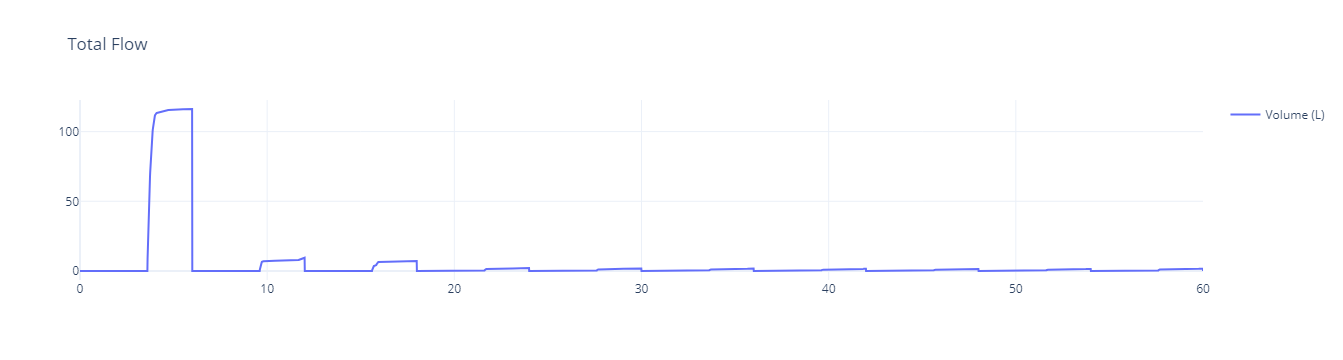

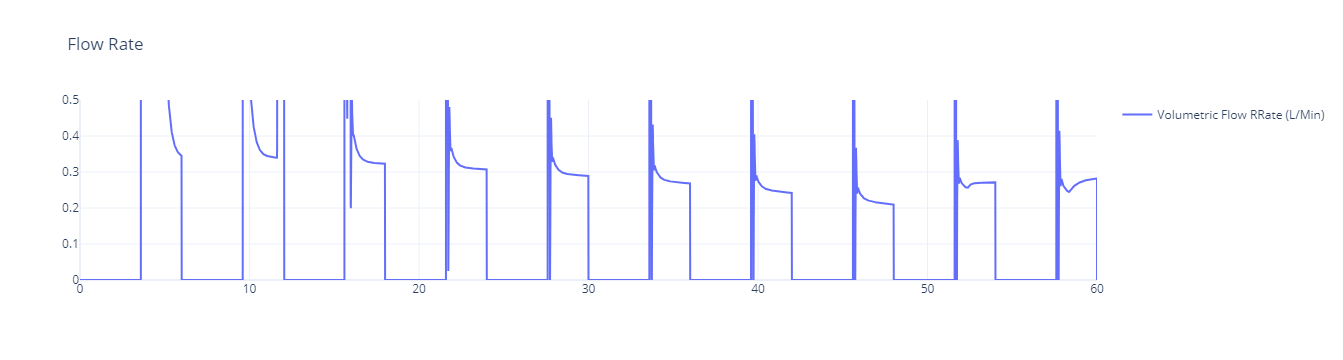

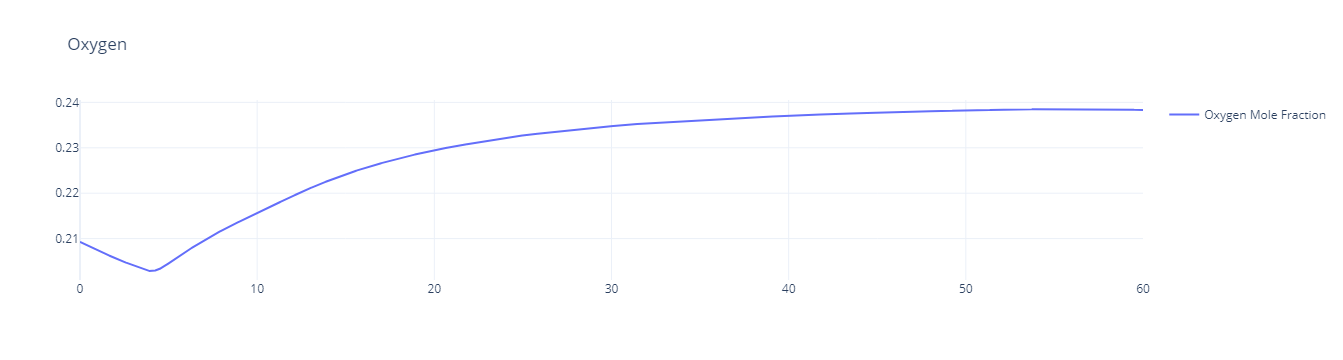

In [41]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

results = acel.lib.results('amesim_model')
data_frame_acc = results.get(scenarios = "Simulation")
fig1 = make_subplots(rows=1, cols=1)
colorlist = px.colors.qualitative.Plotly
for idx, architecturename in enumerate(set(data_frame_acc.Architecture)):
    data_frame_sim = results.get(scenarios = 'Simulation', architectures=[architecturename])
    showlegend = True if idx == 0 else False     
    fig1.add_scatter(x=data_frame_sim['Time'],y=data_frame_sim['VolSensor_0.Volume'], name='Volume (L)', 
                     mode="lines", row=1, col=1, showlegend=showlegend, line=dict(color=colorlist[0]))
fig1.update_layout(title="Total Flow")
fig1.show()    

fig2 = make_subplots(rows=1, cols=1)
colorlist = px.colors.qualitative.Plotly
for idx, architecturename in enumerate(set(data_frame_acc.Architecture)):
    data_frame_sim = results.get(scenarios = 'Simulation', architectures=[architecturename])
    showlegend = True if idx == 0 else False     
    fig2.add_scatter(x=data_frame_sim['Time'],y=data_frame_sim['VolSensor_0.VolFlow'], name='Volumetric Flow RRate (L/Min)', 
                     mode="lines", row=1, col=1, showlegend=showlegend, line=dict(color=colorlist[0]))
fig2.update_layout(title="Flow Rate", yaxis_range=[0,0.5])
fig2.show()    


fig3 = make_subplots(rows=1, cols=1)
colorlist = px.colors.qualitative.Plotly
for idx, architecturename in enumerate(set(data_frame_acc.Architecture)):
    data_frame_sim = results.get(scenarios = 'Simulation', architectures=[architecturename])
    showlegend = True if idx == 0 else False     
    fig3.add_scatter(x=data_frame_sim['Time'],y=data_frame_sim['P_O2_Sensor_0.o2_frac'], name='Oxygen Mole Fraction', 
                     mode="lines", row=1, col=1, showlegend=showlegend, line=dict(color=colorlist[0]))
fig3.update_layout(title="Oxygen")
fig3.show()   

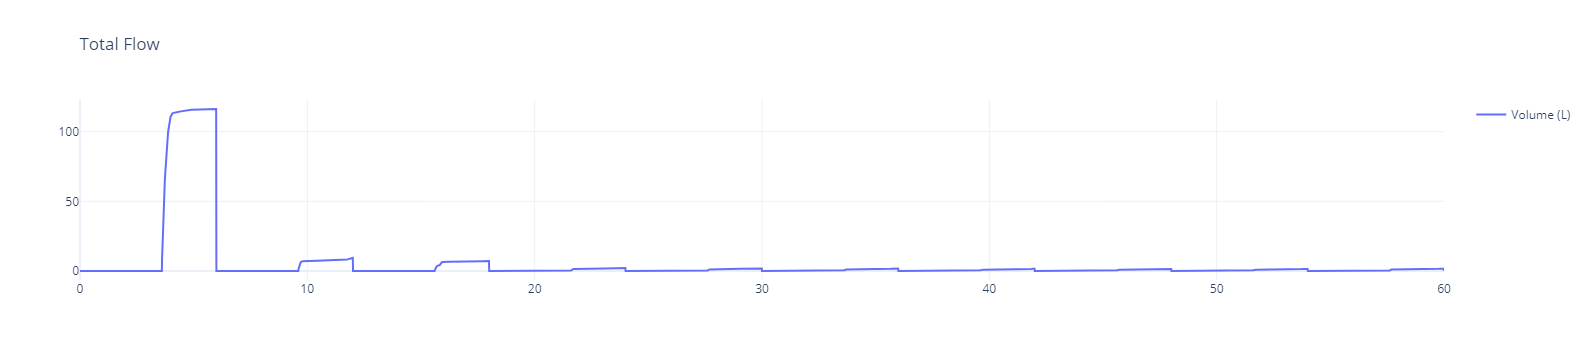

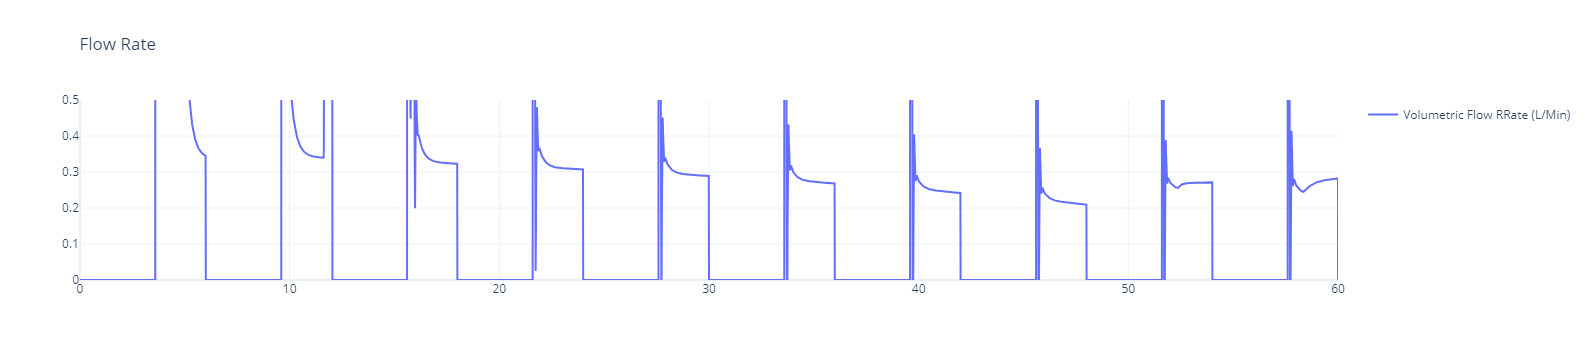

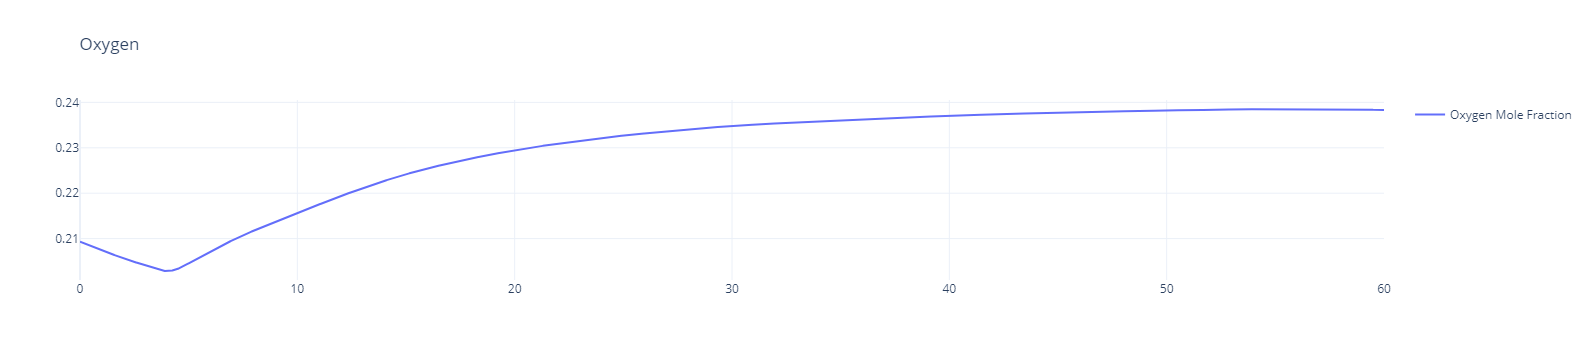